# Assn05:  Clustering and Classification


<br>
<br>

The goals of this assignment are:

1. To conduct both **unsupervised learning** (clustering) and **supervised learning** (classification) on one dataset.
2. To compare the results of supervised and unsupervised learning.

The learning algorithms used will be:

* Unsupervised learning : &nbsp; &nbsp; **K-Means Clustering**
* Supervised learning : &nbsp; &nbsp; **K-Nearest Neighbors Classification**

<br>
<br>

You will need the following import statements to complete this assignment:

<br>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')   # this will suppress warning from sklearn


<br>

___


⚠️ Note that the following files must be saved in the *same folder* as this notebook:

* **Assn05-dataset.csv** : &nbsp; &nbsp; dataset to be used for *unsupervised* learning
* **Assn05-dataset-with-labels.csv** : &nbsp; &nbsp; dataset to be used for *supervised* learning

<br>

<br>
<br>

___

## Part 1:  &nbsp; Unsupervised learning

<br>
<br>



<br>

<span style="color:#D30000"><b>Task 1:</b>   Execute the code below to verify that you can successfully load and plot the dataset.</span>



<span style="color:#D30000">Note that this dataset contains 100 observations for each of two variables (<code>x0</code> and <code>x1</code>).</span>

<br>

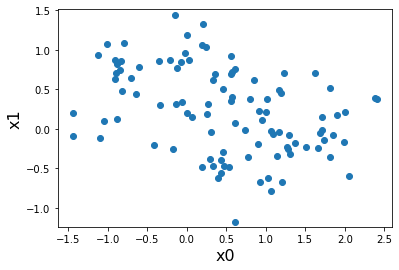

number of observations in the dataset:  100


In [2]:
fnameCSV = 'Assn05-dataset.csv' 
x        = np.loadtxt(fnameCSV, delimiter=',') 
x0       = x[:,0]
x1       = x[:,1]

plt.figure()
ax = plt.axes()
ax.plot(x0, x1, 'o')
ax.set_xlabel('x0', size=16)
ax.set_ylabel('x1', size=16)
ax.axis('equal')
plt.show()
print("number of observations in the dataset: ", len(x))

<br>

<span style="color:#D30000"><b>Task 2:</b>   Run unsupervised learnign on this dataset.</span>



<span style="color:#D30000">Use K-Means Clustering with two clusters.</span>



<span style="color:#D30000">Plot the data and decision surface (see Lesson 10.3 "Decision Surfaces" in the open textbook, and the <code>plot_decision_surface</code> function;  you can copy-and-paste that function here, or write your own decision surface plotting code).</span>

<br>

Fitted cluster labels:  [0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1]


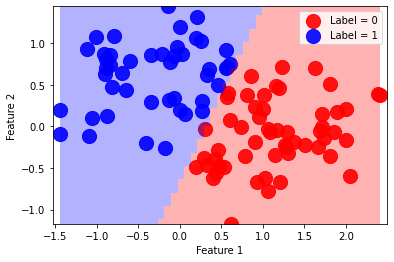

In [3]:
# define plot_decision_surface function
def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )
plot_decision_surface(kmeans, x, labels, colors=['r','b'])

<br>

<span style="color:#007DD3"><b>Question 1:</b>   Are these clusters well-separated?</span>



<span style="color:#007DD3">Answer in a Markdown cell.</span>

<br>

No

<br>

<span style="color:#D30000"><b>Task 3:</b>   Use one or more performance metrics from <code>sklearn</code> to justify your answer to Question 1.1.</span>



<span style="color:#D30000">Hint: see Lesson 11.3 "Performance" in the open textbook.</span>

<br>

In [4]:
sscore  = sklearn.metrics.silhouette_score(x, labels)

print("silhouette coefficient", sscore)
print( f"The silhouette coefficient values is low, suggesting poor cluster sepearation.")


silhouette coefficient 0.4689408298122336
The silhouette coefficient values is low, suggesting poor cluster sepearation.


<br>
<br>
<br>

<br>
<br>

___

## Part 2:  &nbsp; Supervised learning

<br>
<br>


<br>

<span style="color:#D30000"><b>Task 4:</b>   Run the code below to verify that you can load the data file and separate the columns into data and labels.</span>

<br>

In [5]:
fnameCSV = 'Assn05-dataset-with-labels.csv' 
A        = np.loadtxt(fnameCSV, delimiter=',') 
x        = A[:,0:2]  # the data are stored in first two columns
labels   = np.asarray( A[:,2] , dtype=int)  # the labels are stored in the third column

print( A.shape )
print( x.shape )
print( labels.shape )
print( labels )


(100, 3)
(100, 2)
(100,)
[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]


<br>

<span style="color:#007DD3"><b>Question 2:</b>   How many unique labels does this dataset have?</span>

<br>

In [6]:
print(f" There are {len(np.unique(labels))} and the values are {np.unique(labels)}")

 There are 2 and the values are [0 1]


<br>

<span style="color:#D30000"><b>Task 5:</b>   Plot the data. Use different colors for the different labels.</span>

<br>

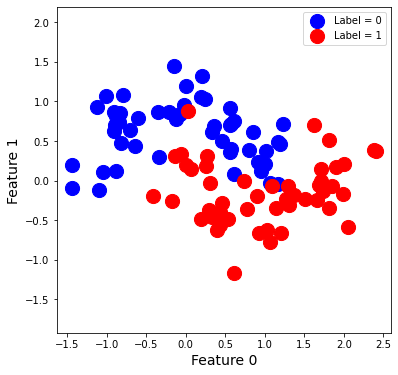

In [7]:
x0     = x[labels==0]  # features for all observations in Group "0"
x1     = x[labels==1]  # features for all observations in Group "1"


plt.figure(figsize=(6,6))
ax     = plt.axes()
colors = ['b','r','g']
ax.scatter( x0[:,0], x0[:,1], color=colors[0], s=200, label='Label = 0' )
ax.scatter( x1[:,0], x1[:,1], color=colors[1], s=200, label='Label = 1' )

ax.set_xlabel('Feature 0', size=14)
ax.set_ylabel('Feature 1', size=14)
ax.axis('equal')
ax.legend()
plt.show()

<br>

<span style="color:#007DD3"><b>Question 3:</b>   Is there more overlap between the clusters than the K-Means results above?</span>



<span style="color:#007DD3">Answer "Yes" or "No"</span>

<br>

Yes

<br>

<span style="color:#D30000"><b>Task 6:</b>   Use a K-Neighbors Classifier to conduct supervised learning on <b>all observations</b> then plot the decision surface.</span>



<span style="color:#D30000">Use <code>k=10</code></span>



<span style="color:#D30000">("k" is the number of neighbors)</span>

<br>

KNeighborsClassifier(n_neighbors=10)


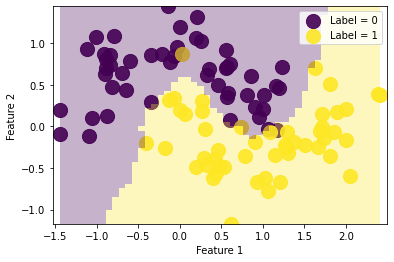

In [8]:
# train a KNN classifier
knc    = KNeighborsClassifier(n_neighbors=10)
knc.fit(x, labels)
print( knc )

# plot the decision surface
plt.figure()
ax = plt.axes()
plot_decision_surface(knc, x, labels, ax=ax)
plt.show()



<br>

<span style="color:#007DD3"><b>Question 4:</b>   Is the decision boundary linear, like in the K-Means analysis above?</span>



<span style="color:#007DD3">Answer "Yes" or "No"</span>

<br>

No

<br>

<span style="color:#D30000"><b>Task 7:</b>   Use Python to calculate the classification rate for this fitted KNN classifier.</span>

<br>

In [9]:
labels_pred_train = knc.predict(x)
cr_train          = accuracy_score(labels, labels_pred_train)
print( f'Classification rate (training) = {cr_train}' )

Classification rate (training) = 0.97


<br>
<br>
<br>

<br>

<span style="color:#D30000"><b>Task 8:</b>   Use iterative simulation to validate the classification rate you calculated in the question above.</span>



<span style="color:#D30000">Use:</span>



* <span style="color:#D30000"> A test set size of 10 observations</span>

* <span style="color:#D30000"> At least 100 simulation iterations</span>

* <span style="color:#D30000"> <code>k=10</code>  (for the K-Neighbors classifier)</span>





<span style="color:#D30000">Import new <code>sklearn</code> functions if necessary.</span>



<span style="color:#D30000">Hint:  use <code>from sklearn.model_selection import train_test_split</code>, where the <code>train_test_split</code> function can be used to split the data into training and test sets.</span>



<span style="color:#D30000">Refer to the Open Textbook for additional details regarding validation.</span>



<span style="color:#D30000">The final result should be the average classification rate (CR) across simulation iterations. Use <code>print</code> to report the average CR.  Optionally also plot the CR distribution (i.e., the distribution across simulation iterations).</span>

<br>

Average classification rate (CR) across iterations 0.95


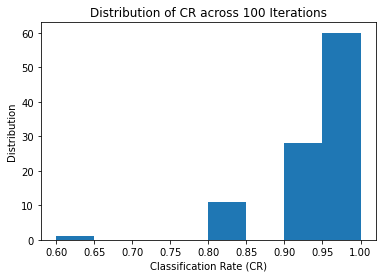

In [10]:
niter   = 100   # number of iterations

np.random.seed(0)

CR      = []
for i in range(niter):
    x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.1)
    knc    = KNeighborsClassifier(n_neighbors=10)
    knc.fit(x_train, labels_train)
    labels_pred_test  = knc.predict(x_test)
    cr_test           = accuracy_score(labels_test, labels_pred_test)
    CR.append( cr_test )

CR = np.array(CR)
print(f"Average classification rate (CR) across iterations {np.mean(CR).round(2)}")


# plot the distribution acoss simulation iteration
plt.figure()
plt.hist(CR, bins = 8)
plt.ylabel("Distribution")
plt.xlabel("Classification Rate (CR)")
plt.title("Distribution of CR across 100 Iterations")
plt.show()

Excellent! Very nice Python code, very clear answers. Well done!